# Laboratório

Este notebook apresenta, exercícios introdutórios usando a JGraphT **Python bindings**
cuja documentação encontra-se no link abaixo:

https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/

Para realizar esta aula com sucesso, é fundamental ler/revisar/executar previamente o notebook da aula anterior:

https://colab.research.google.com/drive/19NIGephKmvdYwdhgq8hwuFhvwwwTB7me?usp=sharing

*Atenção:* Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação e Importação de Pacotes e Arquivos


In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
from drawutil import draw_graph
from importutil import import_gml,read_multiple_CSV

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/bp1.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/cubo.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/10cities.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K5.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K3.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K2.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/datasets/nomes.csv
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/datasets/amigos.csv

# Funções e pacotes para teste
import unittest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-13 16:11:52--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6783 (6.6K) [text/plain]
Saving to: ‘drawutil.py.1’

drawutil.py.1       100%[===================>]   6.62K  --.-KB/s    in 0s      

2022-10-13 16:11:52 (74.1 MB/s) - ‘drawutil.py.1’ saved [6783/6783]

--2022-10-13 16:11:52--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubuserconten

# Conceitos Gerais explorados neste Roteiro

## Iterando sobre vértices e arestas

---


A maneira mais simples de iterar sobre os vértices e arestas do grafo é utilizando as coleções de vértices e arestas retornadas pelos métodos *vertices* e *edges* da [interface Graph](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/interfaces.html#graph). A seguir, apresentamos exemplos usando o comando *for* e *list comprehension*.

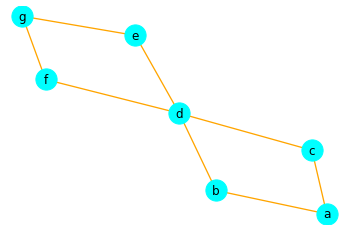

Graus dos vértices: 
d(a): 2
d(b): 2
d(c): 2
d(d): 4
d(e): 2
d(f): 2
d(g): 2

Grau máximo: 4, Grau mínimo: 2, Grau médio: 2.2857142857142856


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "bp1.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "K2.gml", "K3.gml", "10cities.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

# Importando o grafo
v_g1 = {} # atributos de vértices
e_g1 = {} # atributos de arestas
g1 = jgrapht.create_graph(directed=False)
import_gml(g1,v_g1,e_g1,filename)
draw_graph(g1,layout=layout,vlabel='label',v_attrs=v_g1)

# Usando comando for para imprimir os graus dos vértices
print("Graus dos vértices: ")
for v in g1.vertices:
  labelv = v_g1[v]['label']
  print(f'd({labelv}): {g1.degree_of(v)}')

# Usando list comprehension para imprimir os graus máximo, mínimo e médio
degrees = [g1.degree_of(v) for v in g1.vertices]
print(f"\nGrau máximo: {max(degrees)}, Grau mínimo: {min(degrees)}, Grau médio: {sum(degrees)/g1.number_of_vertices}")

# Exercícios


## (01)

Escreva uma função, **vizinhos**, que recebe um grafo *g* como entrada, um identificador *v* de um vértice deste grafo e retorna uma lista com os vizinhos de *v*.


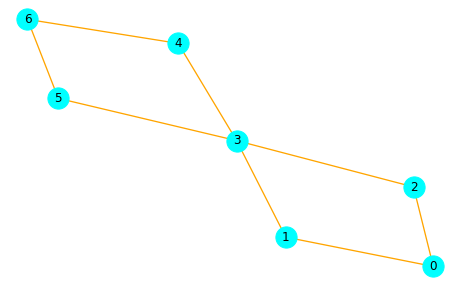

Vizinhos de 0: [2, 1]
Vizinhos de 1: [0, 3]
Vizinhos de 2: [0, 3]
Vizinhos de 3: [1, 2, 4, 5]
Vizinhos de 4: [3, 6]
Vizinhos de 5: [3, 6]
Vizinhos de 6: [5, 4]


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "bp1.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "10cities.gml", "K2.gml", "K3.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def vizinhos (g,vid):
  vertices = []
  for i in g.edges_of(vid):
    vertices.append(g.opposite(i, vid))
  return vertices

# Código para Teste
v_g2 = {} # atributos de vértices
e_g2 = {} # atributos de arestas
g2 = jgrapht.create_graph(directed=False)
import_gml(g2,v_g2,e_g2,filename)
draw_graph(g2,layout=layout,vertexid_aslabel=True)
for v in g2.vertices:
  print(f'Vizinhos de {v}: {vizinhos(g2,v)}')


## (02)

Considere o programa abaixo que cria um grafo a partir de duas tabelas de dados no formato CSV. As tabelas estão definidas nos seguintes arquivos anexados neste notebook:
- nomes.csv
- amigos.csv

onde o atributo *nome* em nomes.csv possui os nomes das pessoas os quais são utilizados em amigos.csv para representar as pessoas através dos atributos *nome1* e *nome2*.

Complete o código abaixo, imprimindo na tela os nomes dos amigos diretos de uma certa *pessoa* selecionada no form, em ordem alfabética. O nome da pessoa está definido na variável **pessoa**.

Exemplo:

Se pessoa = "Maria", o código abaixo deve imprimir:

Cristina

Eduardo

Joao

**Dica**: Use a função *vizinhos* implementada no exercício anterior, mas fique atento: antes de invocar a função, é necessário obter o identificador do vértice associado ao nome na variável **pessoa**. Da mesma forma, os vizinhos retornados pela função devem ser impressos com seus nomes e não os identificadores de vértices. Estas informações podem ser obtidas consultando o dicionário de vértices.


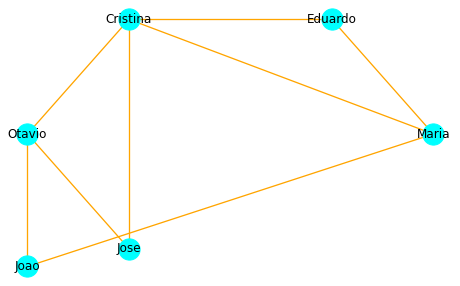

Eduardo
Jose
Maria
Otavio


In [ ]:
#@title  { vertical-output: true }
#@title  { run: "auto", vertical-output: true }
#@title  { vertical-output: true }



pessoa = "Cristina" #@param ["Joao", "Maria", "Eduardo", "Cristina", "Otavio", "Jose"]
# Criando a instância do grafo (multigrafo, não-direcionado, não-ponderado)
# e seus dicionários vazios de vértices e arestas
g2 = jgrapht.create_graph(directed=False,weighted=False,allowing_multiple_edges=True)
v_g2 = {}
e_g2 = {}
read_multiple_CSV(g2,v_g2,e_g2,
                  vfilename='nomes.csv',vid='nome',vlabel='nome',
                  efilename='amigos.csv',esourceid='nome1',etargetid='nome2')
draw_graph(g2,vlabel='nome',v_attrs=v_g2,width=11,height=11)

amigos = []
amigosf = []
for e in v_g2:
  if (v_g2[e]["label"] == pessoa):
    for i in g2.edges_of(e):
      amigos.append(g2.opposite(i, e))
    break

for b in amigos:
  amigosf.append(v_g2[b]["label"])

amigosf.sort()

for b in amigosf:
  print(b)


# Escreva aqui o seu código



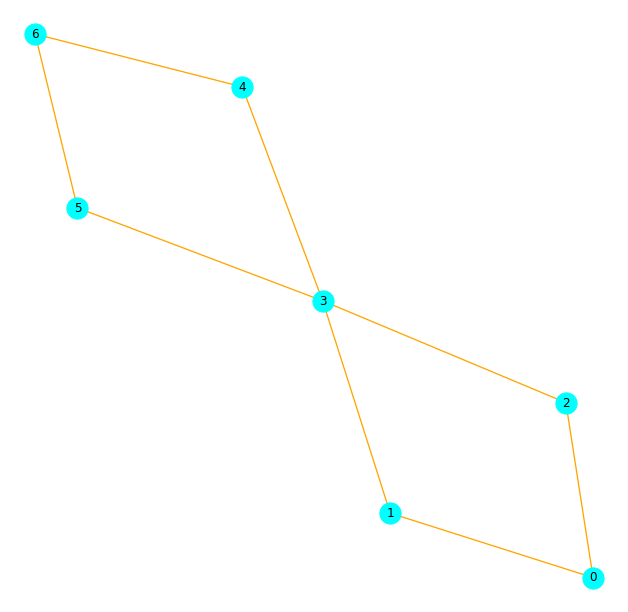

Vizinhos de 0: [2, 1]
Vizinhos de 1: [0, 3]
Vizinhos de 2: [0, 3]
Vizinhos de 3: [1, 2, 4, 5]
Vizinhos de 4: [3, 6]
Vizinhos de 5: [3, 6]
Vizinhos de 6: [5, 4]


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "bp1.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "10cities.gml", "K2.gml", "K3.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def vizinhos (g,vid):
  vertices = []
  for i in g.edges_of(vid):
    vertices.append(g.opposite(i, vid))
  return vertices

# Código para Teste
v_g2 = {} # atributos de vértices
e_g2 = {} # atributos de arestas
g2 = jgrapht.create_graph(directed=False)
import_gml(g2,v_g2,e_g2,filename)
draw_graph(g2,layout=layout,vertexid_aslabel=True)
for v in g2.vertices:
  print(f'Vizinhos de {v}: {vizinhos(g2,v)}')


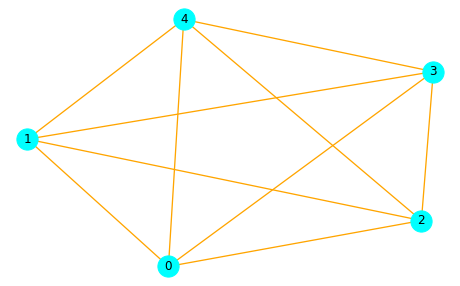

False
Vizinhos de 0: [2, 1, 3, 4]
False
Vizinhos de 1: [2, 0, 3, 4]
False
Vizinhos de 2: [1, 0, 3, 4]
False
Vizinhos de 3: [0, 1, 2, 4]
False
Vizinhos de 4: [3, 1, 0, 2]


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "K5.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "10cities.gml", "K2.gml", "K3.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def vizinhos (g,vid):
  vertices = []
  for i in g.edges_of(vid):
    vertices.append(g.opposite(i, vid))
  print(len(g.vertices) == 0 and len(g.edges) == 0)
  return vertices

# Código para Teste
v_g2 = {} # atributos de vértices
e_g2 = {} # atributos de arestas
g2 = jgrapht.create_graph(directed=False)
import_gml(g2,v_g2,e_g2,filename)
draw_graph(g2,layout=layout,vertexid_aslabel=True)
for v in g2.vertices:
  print(f'Vizinhos de {v}: {vizinhos(g2,v)}')


  #@title  { run: "auto", vertical-output: true }
filename = "10cities.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "10cities.gml", "K2.gml", "K3.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def vizinhos (g,vid):
  vertices = []
  for i in g.edges_of(vid):
    vertices.append(g.opposite(i, vid))

  return vertices

# Código para Teste
v_g2 = {} # atributos de vértices
e_g2 = {} # atributos de arestas
g2 = jgrapht.create_graph(directed=False)
import_gml(g2,v_g2,e_g2,filename)
draw_graph(g2,layout=layout,vertexid_aslabel=True)
for v in g2.vertices:
  print(f'Vizinhos de {v}: {vizinhos(g2,v)}')



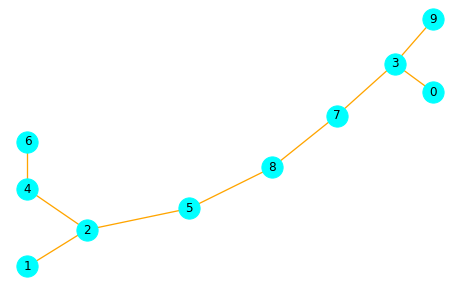

Vizinhos de 0: [3]
Vizinhos de 1: [2]
Vizinhos de 2: [5, 1, 4]
Vizinhos de 3: [0, 7, 9]
Vizinhos de 4: [2, 6]
Vizinhos de 5: [2, 8]
Vizinhos de 6: [4]
Vizinhos de 7: [8, 3]
Vizinhos de 8: [5, 7]
Vizinhos de 9: [3]


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "10cities.gml" #@param ["bp1.gml", "cubo.gml", "K5.gml", "10cities.gml", "K2.gml", "K3.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

def vizinhos (g,vid):
  vertices = []
  for i in g.edges_of(vid):
    vertices.append(g.opposite(i, vid))

  return vertices

# Código para Teste
v_g2 = {} # atributos de vértices
e_g2 = {} # atributos de arestas
g2 = jgrapht.create_graph(directed=False)
import_gml(g2,v_g2,e_g2,filename)
draw_graph(g2,layout=layout,vertexid_aslabel=True)
for v in g2.vertices:
  print(f'Vizinhos de {v}: {vizinhos(g2,v)}')


In [ ]:
from sys import breakpointhook
from jgrapht.properties import has_multipleedges, has_selfloops

grafoCrt = []
def tipos_grafos (g):
  if(len(g.edges)):
    grafoCrt.append("Simples")
    grafoCrt.append("Nulo")
    print("ok")
    return grafoCrt

  if(g.number_of_vertices == 1 and g.number_of_edges == 0):
    grafoCrt.append("Simples")
    grafoCrt.append("Trivial")
    return grafoCrt

  for i in g.number_of_vertices:
    if(g.edges_between(i,i)):
      grafoCrt.append("Pseudografo")
      return grafoCrt

  for e in g.number_of_vertices:
    for x in g.number_of_vertices:
      if(g.edges_between(e,x)):
        grafoCrt.append("Multigrafo")
        return grafoCrt

  if(grafoCrt.len() == 0):
    grafoCrt.append("Simples")
    return grafoCrt


In [ ]:
from sys import breakpointhook
from jgrapht.properties import has_multipleedges, has_selfloops

grafoCrt = []
def tipos_grafos (g):
  if(len(g.edges)):
    grafoCrt.append("Simples")
    grafoCrt.append("Nulo")
    print("ok")
    return grafoCrt

  if(g.number_of_vertices == 1 and g.number_of_edges == 0):
    grafoCrt.append("Simples")
    grafoCrt.append("Trivial")
    return grafoCrt

  for i in g.number_of_vertices:
    if(g.edges_between(i,i)):
      grafoCrt.append("Pseudografo")
      return grafoCrt

  for e in g.number_of_vertices:
    for x in g.number_of_vertices:
      if(g.edges_between(e,x)):
        grafoCrt.append("Multigrafo")
        return grafoCrt

  if(grafoCrt.len() == 0):
    grafoCrt.append("Simples")
    return grafoCrt


In [ ]:
from sys import breakpointhook
from jgrapht.properties import has_multipleedges, has_selfloops

grafoCrt = []
def tipos_grafos (g):
  if(len(g.edges)):
    grafoCrt.append("Simples")
    grafoCrt.append("Nulo")
    print("ok")
    return grafoCrt

  if(g.number_of_vertices == 1 and g.number_of_edges == 0):
    grafoCrt.append("Simples")
    grafoCrt.append("Trivial")
    return grafoCrt

  for i in g.number_of_vertices:
    if(g.edges_between(i,i)):
      grafoCrt.append("Pseudografo")
      return grafoCrt

  for e in g.number_of_vertices:
    for x in g.number_of_vertices:
      if(g.edges_between(e,x)):
        grafoCrt.append("Multigrafo")
        return grafoCrt

  if(grafoCrt.len() == 0):
    grafoCrt.append("Simples")
    return grafoCrt


## (03)

Escreva uma função que classifica um grafo não-direcionado, considerando as seguintes características: Simples, Multigrafo, Pseudografo, Trivial, Nulo. Um mesmo grafo pode possuir mais uma destas características. Por exemplo, o grafo Trivial é também um grafo Simples.
A função **tipos_grafos** deve retornar uma lista com todas as classificações que podem ser dadas ao grafo recebido como parâmetro.

**Dica**: Consulte o pacote [properties](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/properties.html#structural-properties) onde vai encontrar funções que indicam se o grafo possui arestas paralelas ou loops.


In [ ]:
from sys import breakpointhook
from jgrapht.properties import has_multipleedges, has_selfloops

grafoCrt = []
def tipos_grafos (g):
  if(len(g.edges)):
    grafoCrt.append("Simples")
    grafoCrt.append("Nulo")
    print("ok")
    return grafoCrt

  if(g.number_of_vertices == 1 and g.number_of_edges == 0):
    grafoCrt.append("Simples")
    grafoCrt.append("Trivial")
    return grafoCrt

  for i in g.number_of_vertices:
    if(g.edges_between(i,i)):
      grafoCrt.append("Pseudografo")
      return grafoCrt

  for e in g.number_of_vertices:
    for x in g.number_of_vertices:
      if(g.edges_between(e,x)):
        grafoCrt.append("Multigrafo")
        return grafoCrt

  if(grafoCrt.len() == 0):
    grafoCrt.append("Simples")
    return grafoCrt


In [ ]:
# Funções e pacotes para teste
import unittest

class TestSimpleGraph (unittest.TestCase):
  def grafo_nulo (self):
    g = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=True)
    result = tipos_grafos(g)
    self.assertCountEqual(result,["Simples","Nulo"])

  def grafo_trivial (self):
    g = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=True)\
    g.add_vertex(0)
    result = tipos_grafos(g)
    self.assertCountEqual(result,["Simples","Trivial"])

  def grafo_comloop (self):
    g = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=True)
    g.add_vertex(0)
    g.add_edge(0,0)
    result = tipos_grafos(g)
    self.assertCountEqual(result,["Pseudografo"])

  def grafo_comarestasparalelas (self):
    g = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=True)
    g.add_vertex(0)
    g.add_vertex(1)
    g.add_edge(0,1)
    g.add_edge(1,0)
    result = tipos_grafos(g)
    self.assertCountEqual(result,["Multigrafo"])

  def grafo_simples (self):
    g = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=True)
    g.add_vertex(0)
    g.add_vertex(1)
    g.add_vertex(2)
    g.add_edge(0,1)
    g.add_edge(1,2)
    result = tipos_grafos(g)
    self.assertCountEqual(result,["Simples"])

# call your test
suite = unittest.TestSuite()
suite.addTest(TestSimpleGraph('grafo_nulo'))
suite.addTest(TestSimpleGraph('grafo_trivial'))
suite.addTest(TestSimpleGraph('grafo_comloop'))
suite.addTest(TestSimpleGraph('grafo_comarestasparalelas'))
suite.addTest(TestSimpleGraph('grafo_simples'))
unittest.TextTestRunner(verbosity=2).run(suite)

grafo_nulo (__main__.TestSimpleGraph) ... ERROR
grafo_trivial (__main__.TestSimpleGraph) ... ok
grafo_comloop (__main__.TestSimpleGraph) ... FAIL
grafo_comarestasparalelas (__main__.TestSimpleGraph) ... FAIL
grafo_simples (__main__.TestSimpleGraph) ... FAIL

ERROR: grafo_nulo (__main__.TestSimpleGraph)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-23-1175effc9471>", line 7, in grafo_nulo
    result = tipos_grafos(g)
  File "<ipython-input-22-4d9f3ae6c917>", line 16, in tipos_grafos
    for i in g.number_of_vertices:
TypeError: 'int' object is not iterable

FAIL: grafo_comloop (__main__.TestSimpleGraph)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-23-1175effc9471>", line 21, in grafo_comloop
    self.assertCountEqual(result,["Pseudografo"])
AssertionError: Element counts were not equal:
First has 2, Second has 0:  'Simples

<unittest.runner.TextTestResult run=5 errors=1 failures=3>